### 置信区间 - 第一部分

首先让我们导入必要的库和数据集。你还可以获得完整版本的数据和简化版本的数据。简化版本就是你实际使用的一个例子，它只是样本；而完整版本的数据是人口数据中每个个体的实例。

In [1]:
import pandas as pd
import numpy as np

# 设定随机种子（以后可复现抽样）
np.random.seed(42)
# 读入文件
coffee_full = pd.read_csv('coffee_dataset.csv')
# 使用.sample抽取200个样本
# 在实际案例中，这个就应该是你等得到的数据了
coffee_red = coffee_full.sample(200)

In [2]:
coffee_full.shape

(2974, 4)

In [3]:
coffee_red.shape

(200, 4)

In [4]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [5]:
coffee_red['drinks_coffee'].mean()

0.59499999999999997

In [6]:
coffee_full['drinks_coffee'].mean()

0.58977807666442505

In [7]:
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.119629908586163

In [8]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.784922799278775

`1.` 样本中喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`2.` 在喝咖啡的人中，他们的平均身高是多少？在不喝咖啡的人中，他们的平均身高是多少？

`3.` 模拟来自200个原始样本的200个“新”个体。在该有放回抽样样本（bootstrap sample）中，喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`4.` 现在模拟10,000次有放回抽样，并取每个样本中不喝咖啡的人的平均身高。每个有放回抽样样本应该是从200个数据点中取出的第一个样本。绘制分布图，并拉出95％置信区间所需的值。在这个例子中，关于平均数的抽样分布，你发现了什么？

`5.`  你的区间是否记录了人群中不喝咖啡的人的实际平均身高？看一看人口中的平均数和95％置信区间提供的两个界限，然后回答下面的最后一个测试题目。

In [9]:
coffee_red.shape

(200, 4)

In [10]:
# 设定每次抽出的内容为bootstrap_sample
# .sample默认的是replace = Ture
# 就是每次抽取之后，再放回去，就是实现自展（bootstrap）
# 这样的话每次运行都会是不一样的集合
# .sample不受seed影响
bootstrap_sample = coffee_red.sample(200,replace = True)
# 检查下，每次都应该不一样
bootstrap_sample.head()

,user_id,age,drinks_coffee,height
93,2423,>=21,True,69.540052
1239,4172,>=21,True,71.011189
1756,5529,>=21,True,67.857414
879,2639,>=21,True,68.445535
944,4975,>=21,False,74.276003


In [11]:
bootstrap_sample.shape

(200, 4)

In [12]:
bootstrap_sample

,user_id,age,drinks_coffee,height
93,2423,>=21,True,69.540052
1239,4172,>=21,True,71.011189
1756,5529,>=21,True,67.857414
879,2639,>=21,True,68.445535
944,4975,>=21,False,74.276003
2478,2744,>=21,True,67.105035
2957,7368,<21,False,66.615918
1936,5275,>=21,True,69.763944
1309,7876,<21,False,67.340376
741,4606,>=21,True,70.359119


In [13]:
bootstrap_sample['drinks_coffee'].mean()

0.60499999999999998

In [14]:
# 先建立个空列表存储结果
boot_mean = []
# 使用for in range 循环10000遍
for i in range(10000):
    # 生成sample，自展为True
    sample = coffee_red.sample(200, replace = True)
    # 生成mean_s 赋值为不喝咖啡学生的平均身高
    mean_s = sample[sample['drinks_coffee'] == False]['height'].mean()
    # 将这个值附加到列表中
    boot_mean.append(mean_s)

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

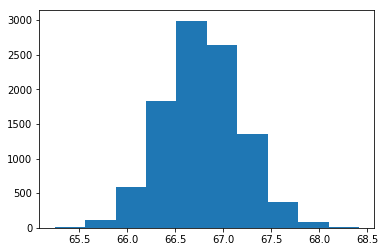

In [16]:
plt.hist(boot_mean);

In [17]:
# 使用np.percentail计算两边截断点值，中间区间就是95%的截断区间
np.percentile(boot_mean, 2.5), np.percentile(boot_mean, 97.5)

(65.992913281575198, 67.584027382815719)

In [18]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.443407762147004